mengimport library yang akan digunakan, pada dasarnya library apa sajapun bisa diimport tanpa menggangu dari coding hanya akan sedikit memberatkan pc.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection


mengimport data atau file yang akan digunakan, data atau file bisa diimport melalui komputer secara langsung jika menggunakan aplikasi offline sejenis jupiter. namun jika anda menggunakan aplikasi sejenis google colab maka data atau file harus diupload terlebih dahulu

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/Data Bank.xlsx')
data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

mengecek data apakah sudah sesuai

In [ ]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

jumlah kolom dan baris

In [ ]:
data.shape

(5000, 14)

mengecek tipe data yang digunakan

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


membuat scatterplot dengan sns atau seaborn atau matplotlib

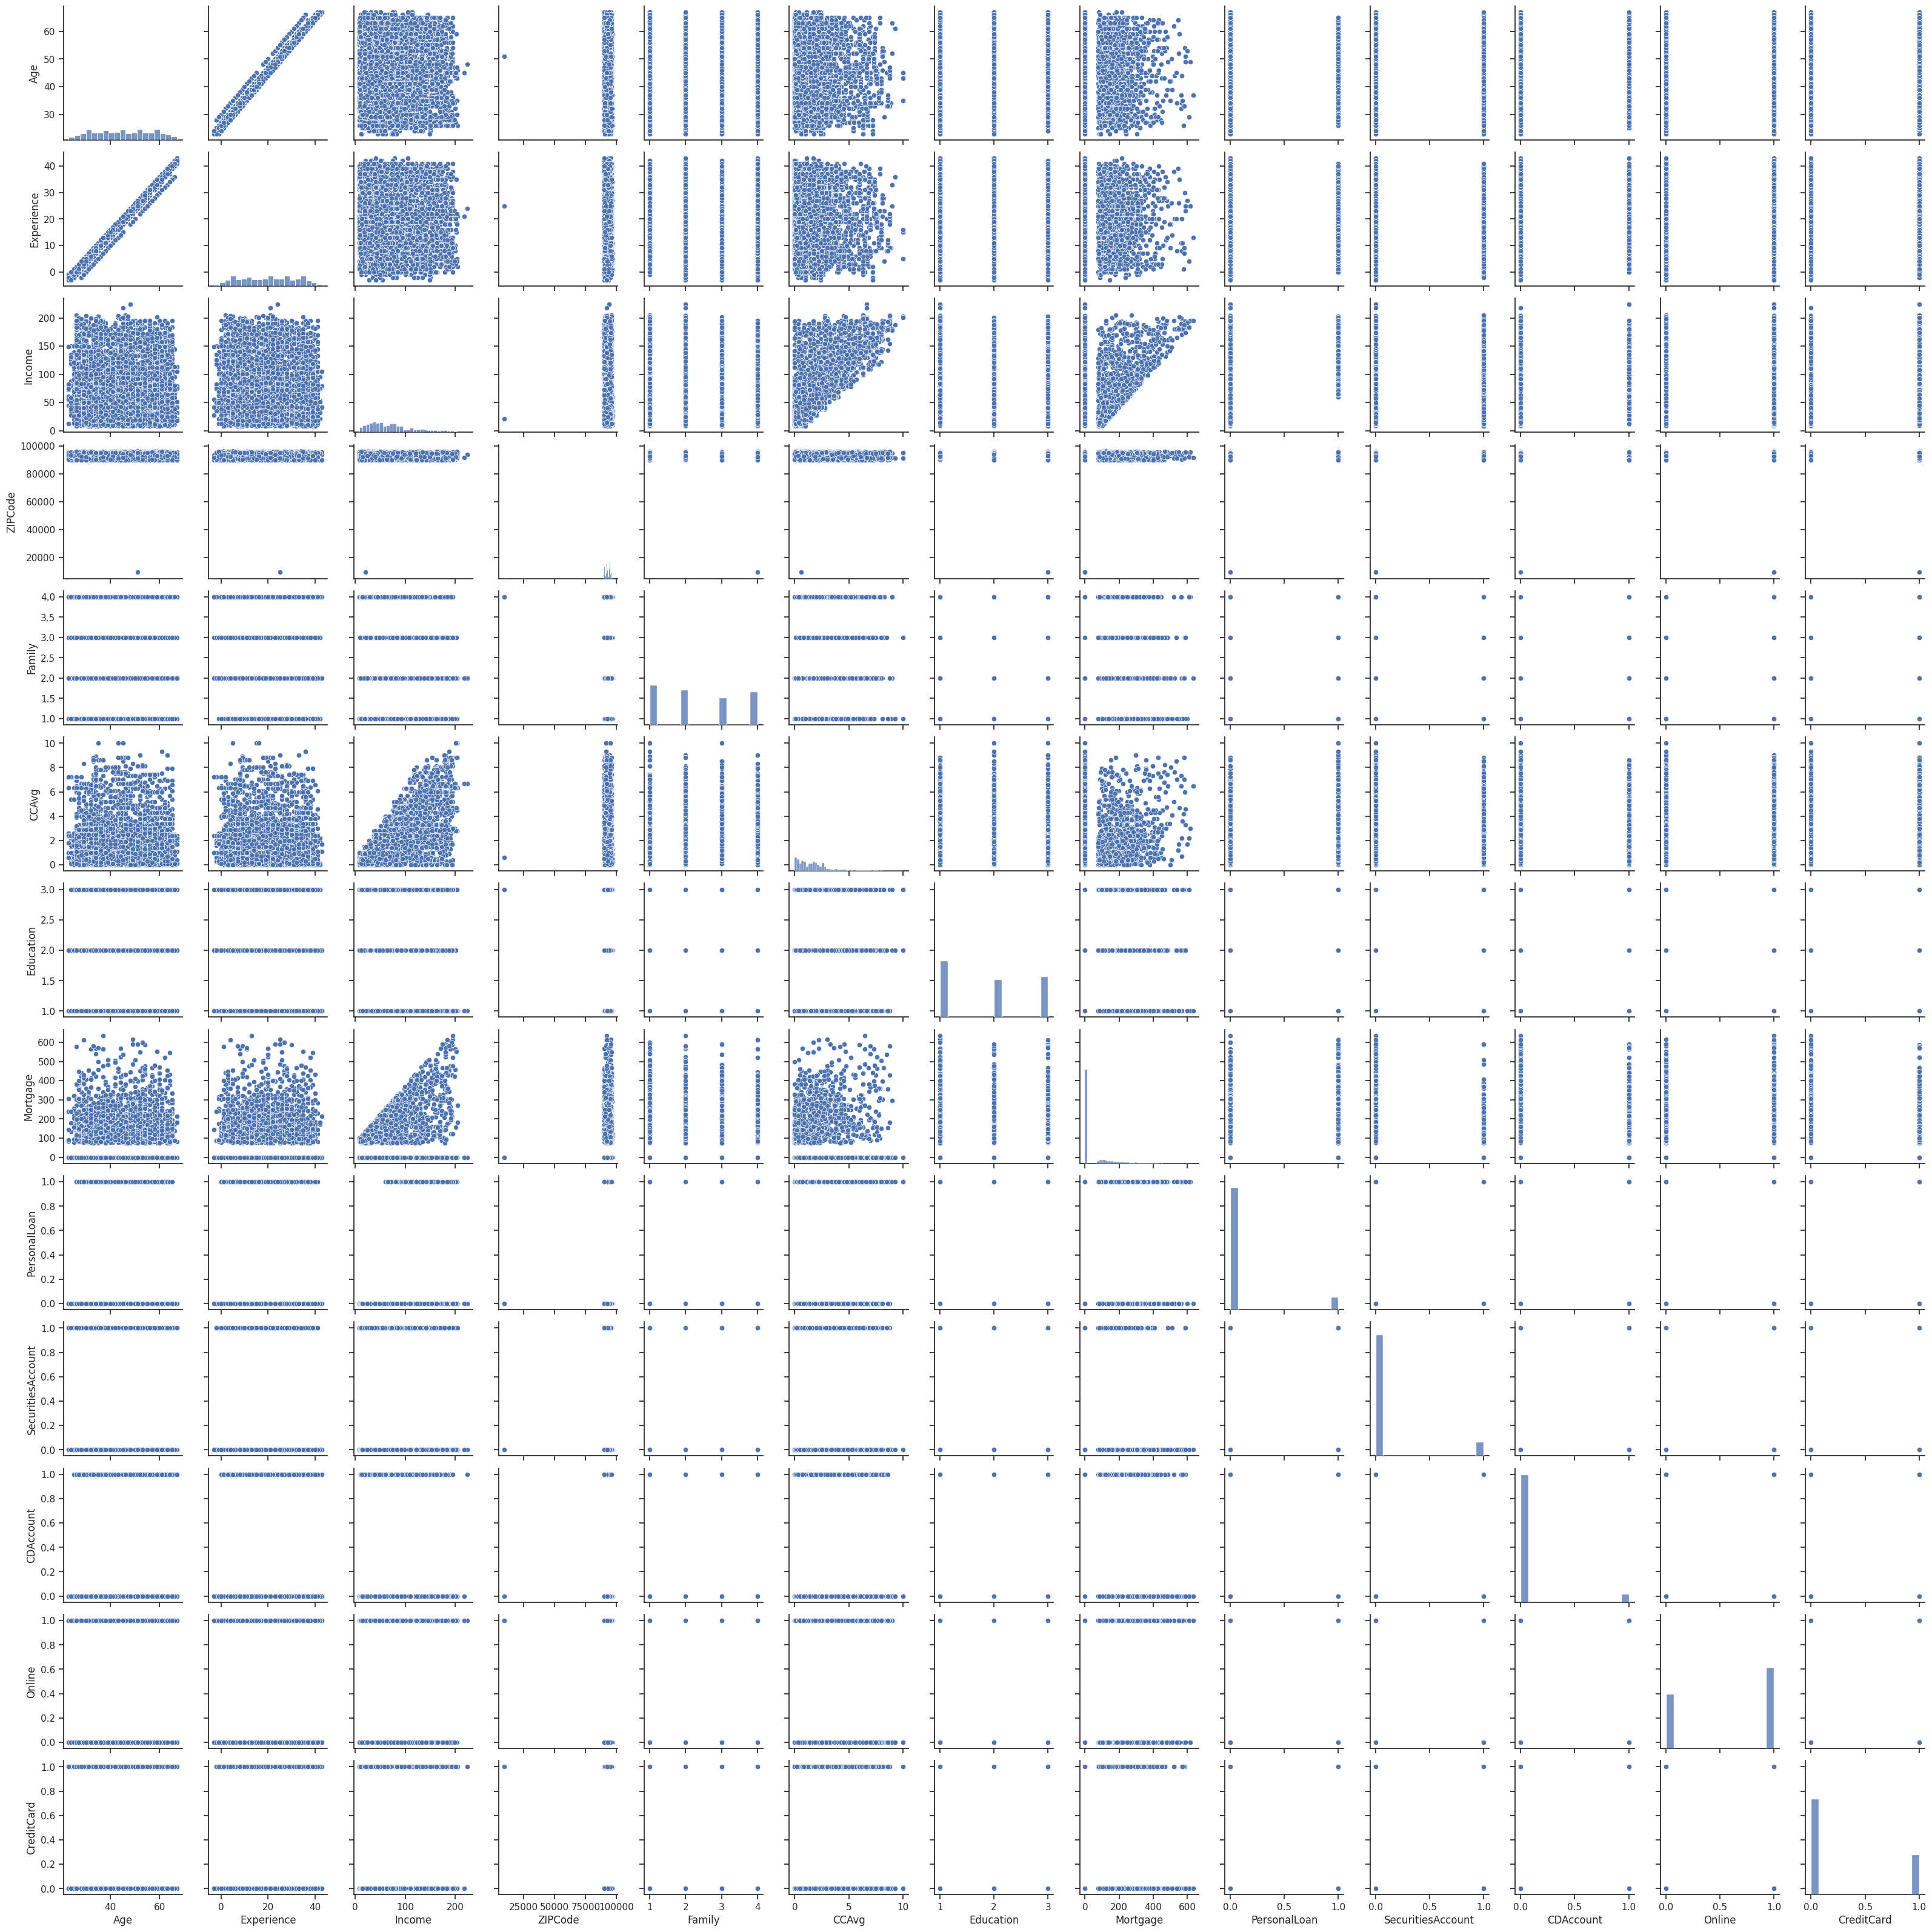

In [ ]:
sns.pairplot(data.iloc[:,1:])

dilakukan pengecekan apakah ada experience value kurang dari 0, dan jika ada maka data akan dibersihkan dan valuenya diganti berdasarkan age dan education

In [ ]:
data[data['Experience'] < 0]['Experience'].count()

52

In [ ]:
dfExp = data.loc[data['Experience'] >0]
negExp = data.Experience < 0
column_name = 'Experience'
mylist = data.loc[negExp]['ID'].tolist()

In [ ]:
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [ ]:
for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

In [ ]:
data[data['Experience'] < 0]['Experience'].count()

0

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<Axes: xlabel='Education', ylabel='Income'>

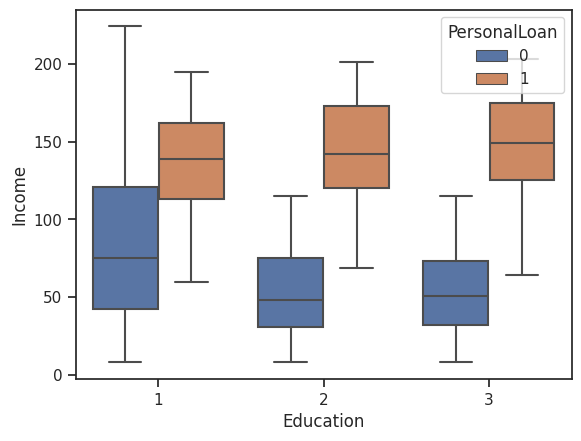

In [ ]:
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=data)

<Axes: xlabel='Education', ylabel='Mortgage'>

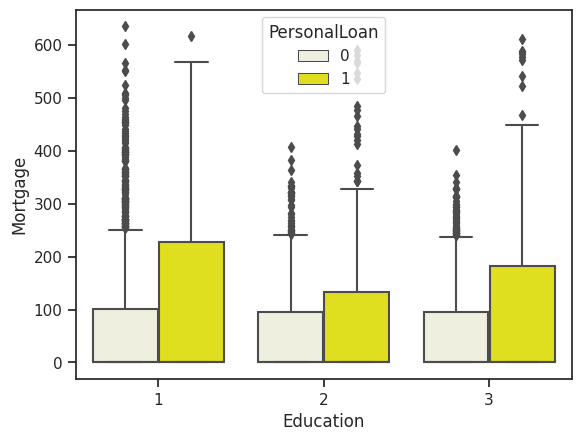

In [ ]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=data,color='yellow')

<Axes: xlabel='SecuritiesAccount', ylabel='count'>

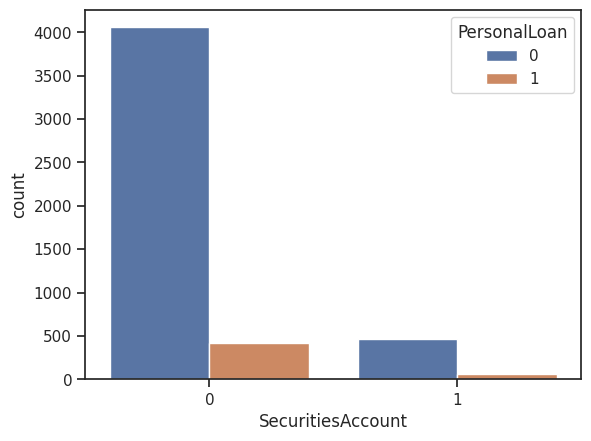

In [ ]:
sns.countplot(x="SecuritiesAccount", data=data,hue="PersonalLoan")

<Axes: xlabel='Family', ylabel='count'>

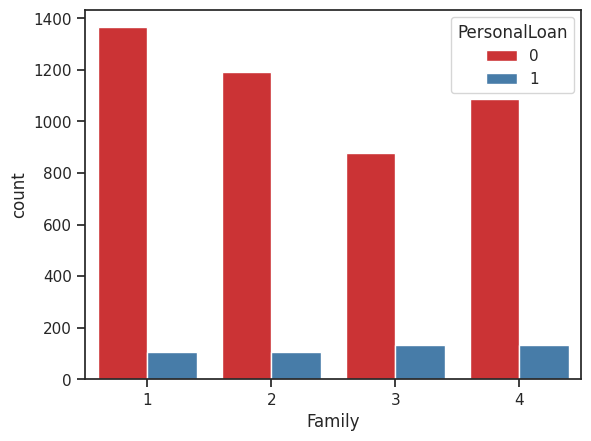

In [ ]:
sns.countplot(x='Family',data=data,hue='PersonalLoan',palette='Set1')

<Axes: xlabel='CDAccount', ylabel='count'>

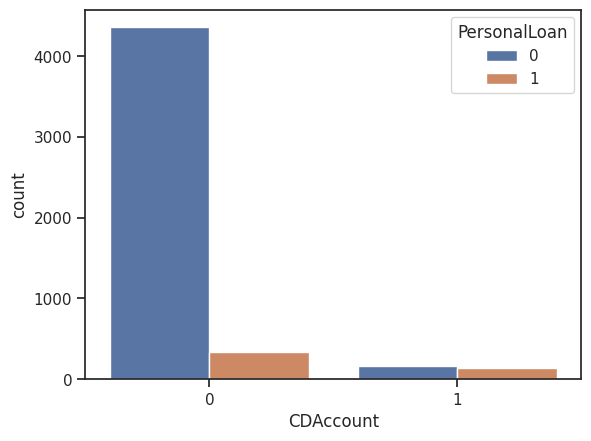

In [ ]:
sns.countplot(x='CDAccount',data=data,hue='PersonalLoan')

<Axes: xlabel='CCAvg', ylabel='Count'>

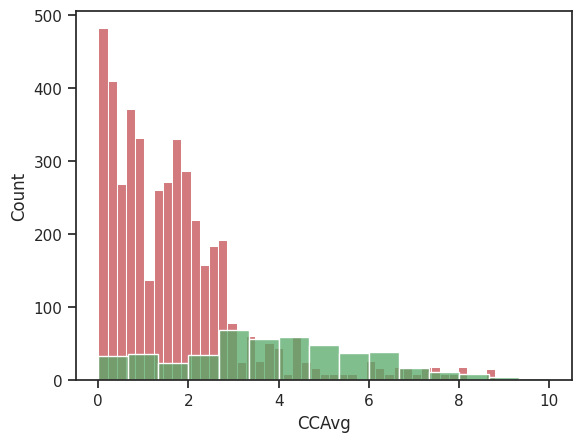

In [ ]:
sns.histplot( data[data.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.histplot( data[data.PersonalLoan == 1]['CCAvg'], color = 'g')

Text(0, 0.5, 'Age')

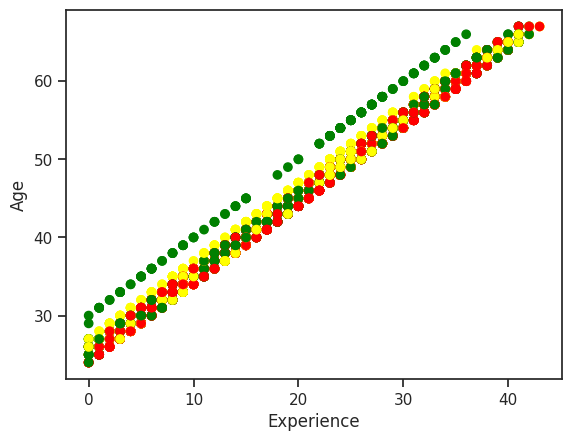

In [ ]:
fig, ax = plot.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(data['Experience'],data['Age'],c=data['Education'].apply(lambda x:colors[x]))
plot.xlabel('Experience')
plot.ylabel('Age')

<Axes: xlabel='Family', ylabel='Income'>

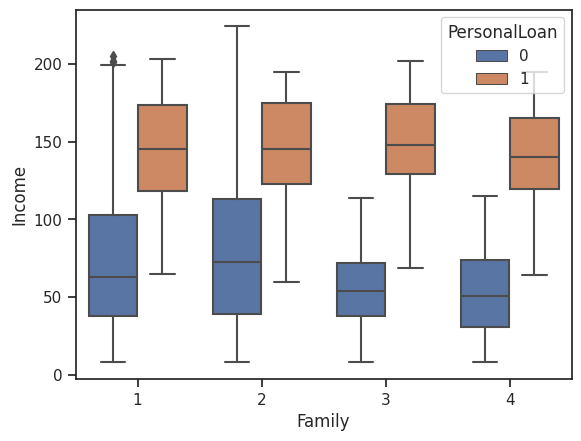

In [ ]:
sns.boxplot(x=data.Family,y=data.Income,hue=data.PersonalLoan)

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

In [ ]:
train_labels = train_set.pop('PersonalLoan')
test_labels = test_set.pop('PersonalLoan')

In [ ]:
train_set_indep = data.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "PersonalLoan" , axis = 1)
train_set_dep = data["PersonalLoan"]
x = np.array(train_set_indep)
y = np.array(train_set_dep)
x_Train = x[ :3500, :]
x_Test = x[3501: , :]
y_Train = y[:3500, ]
y_Test = y[3501:, ]

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(x_Train, y_Train)
predicted = knn.predict(x_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_Test, predicted)
print(acc)

0.9106070713809206
